<a href="https://colab.research.google.com/github/rj7shakya/python_ml/blob/main/2_linearreg_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

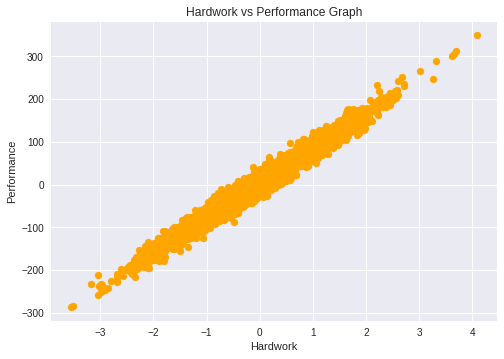

In [3]:
# Load
X = pd.read_csv('https://raw.githubusercontent.com/coding-blocks-archives/machine-learning-online-2018/master/3.%20Linear%20Regression/Linear%20Regression/Training%20Data/Linear_X_Train.csv')
y = pd.read_csv('https://raw.githubusercontent.com/coding-blocks-archives/machine-learning-online-2018/master/3.%20Linear%20Regression/Linear%20Regression/Training%20Data/Linear_Y_Train.csv')

# Convert X,Y to Numpy arrays
X = X.values
y = y.values

plt.style.use('seaborn')
plt.scatter(X,y,color='orange')
plt.title("Hardwork vs Performance Graph")
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.show()

In [4]:
def hypothesis(x,theta):
    y_ = theta[0] + theta[1]*x
    return y_

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x,theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
    return grad/m

def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2
        
    return (total_error/m)
    

def gradientDescent(X,Y,max_steps=100,learning_rate =0.1):
    
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    
   
    for i in range(max_steps):
        
        # Compute grad
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)[0]
        
        
        #Update theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        # Storing the theta values during updates
        theta_list.append((theta[0],theta[1]))
        error_list.append(e)
        
    return theta,error_list,theta_list

In [5]:

theta,error_list,theta_list = gradientDescent(X,y)

In [6]:

theta

array([ 3.72687896, 80.54086647])

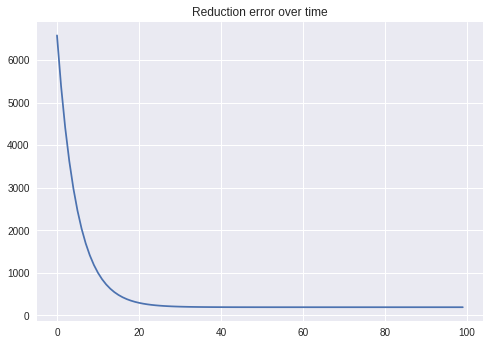

In [7]:
plt.plot(error_list)
plt.title("Reduction error over time")
plt.show()

In [8]:
y_ = hypothesis(X,theta)
print(y_)

[[-19.57419108]
 [-43.69635897]
 [ 86.48322254]
 ...
 [-20.85126634]
 [138.69991375]
 [-35.87967507]]


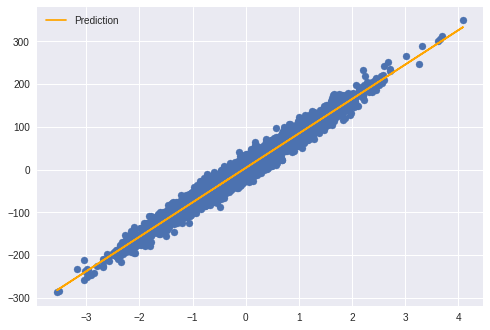

In [9]:
# Training + Predictions
plt.scatter(X,y)
plt.plot(X,y_,color='orange',label="Prediction")
plt.legend()
plt.show()

In [10]:
# Load the test data
X_test = pd.read_csv('https://raw.githubusercontent.com/coding-blocks-archives/machine-learning-online-2018/master/3.%20Linear%20Regression/Linear%20Regression/Test%20Cases/Linear_X_Test.csv').values
y_test = hypothesis(X_test,theta)

In [12]:

df = pd.DataFrame(data=y_test,columns=["y"])
df

,y
0,-147.524391
1,-66.265705
2,-200.056206
3,226.036217
4,51.326541
...,...
1245,-9.808697
1246,78.808891
1247,14.036740
1248,-18.666509


In [13]:

def r2_score(Y,Y_):
    # Instead of Loop, np.sum is recommended as it is fast
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y- Y.mean())**2)
    score = (1- num/denom)
    return score*100

In [14]:
r2_score(y,y_)

97.09612220841039